# IS 6813 - MSBA Capstone - Spring 2023
## EDA Assignment
### Jordan Harmer

In [2]:
# import libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#read in files
sales_df = pd.read_excel('FSOP_Sales_Data_v2.0.xlsb')
cust_df = pd.read_excel('FSOP_Customer_Data_v2.0.xlsb')

In [4]:
#create list of dataframes
df_list = [sales_df, cust_df]

#define function to apply properties to both dfs:
def prop_funk(df_list, func):
    for df in df_list:
        display(getattr(df, func)())
        

### Business Problem:

To determine the profitability of a new business (and to make pricing and funding decisions accordingly), Swire needs to improve their ability to predict the popularity, longevity, and total 3-year sales volume of new customers based on historical results. 

The business problem at Swire Coca-Cola is to accurately predict these three indicators: (1) popularity, (2) longevity, and (3) total 3-year sales volume of new restaurant customers to make informed pricing and funding decisions.

But first, let's take a look at this data.

In [5]:
#check out the data:
prop_funk(df_list, 'head')

,CUSTOMER_NUMBER_BLINDED,PRODUCT_SOLD_BLINDED,BEV_CAT_DESC,CALORIE_CAT_DESC,PACK_TYPE_DESC,PACK_SIZE_SALES_UNIT_DESCRIPTION,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,MIN_POSTING_DATE,MAX_POSTING_DATE,NUM_OF_TRANSACTIONS
0,C0051046109640797,M056203880974,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Contour,20 OZ 1-Ls 24,88.0,2246.40,2505.60,1924.70,1112.73,682.41,44208,44925,157
1,C0348074302380406,M042308250090,CORE SPARKLING,LOW CALORIE,Aluminum Can - Sleek,12 OZ 4-Pk 24,58.0,1197.12,1666.92,1468.77,316.19,1185.98,44229,44925,40
2,C0277089703710223,M010605530774,TEA,LOW CALORIE,Plastic Bottle - Other,18.5 OZ 1-Ls 12,108.0,3429.00,1755.00,1499.03,403.25,1107.73,44627,44925,62
3,C0112072503650635,M050800200648,ENERGY DRINKS,REGULAR CALORIE,Aluminum Can,16 OZ 1-Ls 24,15.0,307.12,592.88,553.18,77.90,475.28,44721,44925,17
4,C0305009008200279,M009608400345,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Dimple,2 LTR 1-Ls 8,195.0,3382.05,2077.95,1812.90,661.21,1416.99,44201,44925,166


,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ON_BOARDING_DATE,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION
0,C0895044502170683,"Tucson, AZ","Tucson, AZ",42772,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
1,C0409008701210025,"Tacoma, WA","Tacoma Sales Center, WA",39944,FORT LEWIS,98433,PIERCE,-122.587244,47.102365,Eating & Drinking,Quick Service Restau,QSR-Pizza,DSD,Quick Service Restau,FSOP,EATING/DRINKING
2,C0278065006510168,"Walla Walla, WA","Walla Walla, WA",38035,COLLEGE PLACE,99324-9730,WALLA WALLA,-118.373040,46.052920,Other Shopping & Ser,General Merchandiser,Hardware/Home-Improv,DSD,General Merchandiser,FSOP,RETAIL
3,C0559043803480412,"Prescott, AZ","Glendale, AZ",34215,PRESCOTT,86301-3313,YAVAPAI,-112.450490,34.545020,Travel/Transportatio,Lodging,Other Lodging,DSD,Lodging,FSOP,LODGING
4,C0729091103720749,"Reno, NV","Reno, NV",41990,SOUTH LAKE TAHOE,96150-7702,EL DORADO,-119.984227,38.926637,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL


In [6]:
prop_funk(df_list, 'describe')

,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,MIN_POSTING_DATE,MAX_POSTING_DATE,NUM_OF_TRANSACTIONS
count,831858.000000,8.318580e+05,8.318580e+05,8.318580e+05,831858.000000,8.318580e+05,831858.000000,831858.000000,831858.00000
mean,36.217353,1.003787e+03,9.264591e+02,8.452879e+02,294.972454,5.802734e+02,44423.544945,44751.821293,21.22683
std,564.492624,1.333810e+04,8.980622e+03,7.750825e+03,2631.923407,5.575518e+03,215.661342,215.170795,33.45570
min,-65832.000000,-1.390200e+04,-2.298240e+04,-3.453411e+04,-145562.380000,-7.392340e+03,44198.000000,44198.000000,1.00000
25%,1.000000,1.764000e+01,3.110000e+01,2.928000e+01,8.620000,1.246000e+01,44236.000000,44617.000000,2.00000
50%,5.000000,9.000000e+01,1.368000e+02,1.300000e+02,44.800000,7.270000e+01,44349.000000,44860.000000,7.00000
75%,17.000000,4.134000e+02,5.234200e+02,5.000000e+02,181.950000,2.976700e+02,44593.000000,44925.000000,24.00000
max,136349.000000,2.847662e+06,1.813004e+06,1.813004e+06,883618.130000,1.370468e+06,44925.000000,44926.000000,468.00000


,ON_BOARDING_DATE,GEO_LONGITUDE,GEO_LATITUDE
count,4.038600e+04,40386.000000,40386.000000
mean,4.182987e+04,-114.132819,40.809191
std,1.481497e+04,6.306469,5.040605
min,2.979900e+04,-124.590450,0.000000
25%,4.048400e+04,-121.312581,37.423862
50%,4.277400e+04,-112.057996,40.601765
75%,4.401275e+04,-110.990696,45.508061
max,2.958465e+06,0.000000,49.002050


In [7]:
prop_funk(df_list, 'info')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831858 entries, 0 to 831857
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CUSTOMER_NUMBER_BLINDED           831858 non-null  object 
 1   PRODUCT_SOLD_BLINDED              831858 non-null  object 
 2   BEV_CAT_DESC                      758235 non-null  object 
 3   CALORIE_CAT_DESC                  758235 non-null  object 
 4   PACK_TYPE_DESC                    831858 non-null  object 
 5   PACK_SIZE_SALES_UNIT_DESCRIPTION  831858 non-null  object 
 6   PHYSICAL_VOLUME                   831858 non-null  float64
 7   DISCOUNT                          831858 non-null  float64
 8   INVOICE_PRICE                     831858 non-null  float64
 9   DEAD_NET                          831858 non-null  float64
 10  GROSS_PROFIT_DEAD_NET             831858 non-null  float64
 11  COGS                              831858 non-null  f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40386 entries, 0 to 40385
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CUSTOMER_NUMBER_BLINDED                 40386 non-null  object 
 1   SALES_OFFICE_DESCRIPTION                40386 non-null  object 
 2   DELIVERY_PLANT_DESCRIPTION              40386 non-null  object 
 3   ON_BOARDING_DATE                        40386 non-null  int64  
 4   ADDRESS_CITY                            40386 non-null  object 
 5   ADDRESS_ZIP_CODE                        40386 non-null  object 
 6   COUNTY                                  40384 non-null  object 
 7   GEO_LONGITUDE                           40386 non-null  float64
 8   GEO_LATITUDE                            40386 non-null  float64
 9   CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION   40386 non-null  object 
 10  CUSTOMER_TRADE_CHANNEL_DESCRIPTION      40386 non-null  ob

None

In [8]:
prop_funk(df_list, 'nunique')

CUSTOMER_NUMBER_BLINDED              40390
PRODUCT_SOLD_BLINDED                  1558
BEV_CAT_DESC                            11
CALORIE_CAT_DESC                         2
PACK_TYPE_DESC                          25
PACK_SIZE_SALES_UNIT_DESCRIPTION       177
PHYSICAL_VOLUME                       7123
DISCOUNT                            136631
INVOICE_PRICE                       156342
DEAD_NET                            170227
GROSS_PROFIT_DEAD_NET               123676
COGS                                151687
MIN_POSTING_DATE                       718
MAX_POSTING_DATE                       666
NUM_OF_TRANSACTIONS                    412
dtype: int64

CUSTOMER_NUMBER_BLINDED                   40386
SALES_OFFICE_DESCRIPTION                     44
DELIVERY_PLANT_DESCRIPTION                   43
ON_BOARDING_DATE                           6816
ADDRESS_CITY                               1361
ADDRESS_ZIP_CODE                          26046
COUNTY                                      247
GEO_LONGITUDE                             31169
GEO_LATITUDE                              31098
CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION         8
CUSTOMER_TRADE_CHANNEL_DESCRIPTION           25
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION       48
BUSINESS_TYPE_EXTENSION_DESCRIPTION          12
CUSTOMER_TRADE_CHANNEL_DESCRIPTION2          25
MARKET_DESCRIPTION                            3
COLD_DRINK_CHANNEL_DESCRIPTION                9
dtype: int64

It looks like there are a few customers that appear in 'Sales Data' that don't appear in 'Customer Data.' I'm going to ignore those.

Based on the unique count of customer number in each table, I'm guessing we can join these df's together into one for more cohesive analysis. 

But first, I need to understand the sales df better.

In [9]:
salescnt = sales_df[['CUSTOMER_NUMBER_BLINDED','NUM_OF_TRANSACTIONS']]
salescnt = salescnt.groupby('CUSTOMER_NUMBER_BLINDED').sum().sort_values('NUM_OF_TRANSACTIONS', ascending = False)
utran = salescnt['NUM_OF_TRANSACTIONS'].sum()
print("{:,}".format(salescnt['NUM_OF_TRANSACTIONS'].sum()) + ' Unique Transactions')

17,657,708 Unique Transactions


In [10]:
#avg transactions per customer
utran/len(salescnt)

437.1801931171082

In [11]:
salescnt.head(15)

,NUM_OF_TRANSACTIONS
CUSTOMER_NUMBER_BLINDED,
C0357023609320542,47069
C0857025702270792,38797
C0698076004790271,35852
C0095084905960864,34694
C0508066605720772,32821
C0641098101050424,32464
C0726027909530869,26784
C0079073107800541,23552
C0818025706300033,23140


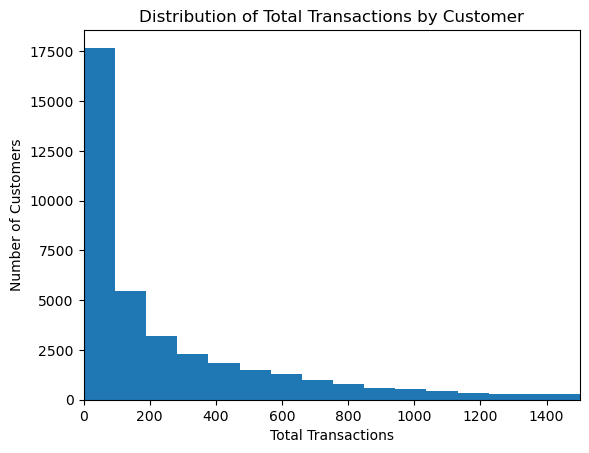

In [12]:
plt.hist(salescnt, bins=500)
# Add a title and axis labels
plt.title('Distribution of Total Transactions by Customer')
plt.xlabel('Total Transactions')
plt.ylabel('Number of Customers')
plt.xlim(0,1500)

# Show the plot
plt.show()


It looks like there are a few customers with a large number of transactions, and a lot of customers with < 200 transactions.

Next, I'm going to try joining these dataframes.

In [13]:
new_df = pd.merge(sales_df, cust_df, on='CUSTOMER_NUMBER_BLINDED', how='left')

In [14]:
print(new_df.shape)
display(new_df.head())
print(new_df.columns)

(831858, 30)


,CUSTOMER_NUMBER_BLINDED,PRODUCT_SOLD_BLINDED,BEV_CAT_DESC,CALORIE_CAT_DESC,PACK_TYPE_DESC,PACK_SIZE_SALES_UNIT_DESCRIPTION,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,...,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION
0,C0051046109640797,M056203880974,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Contour,20 OZ 1-Ls 24,88.0,2246.40,2505.60,1924.70,...,MARICOPA,-111.895906,33.299225,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
1,C0348074302380406,M042308250090,CORE SPARKLING,LOW CALORIE,Aluminum Can - Sleek,12 OZ 4-Pk 24,58.0,1197.12,1666.92,1468.77,...,KING,-122.181942,47.705646,Grocery Shopping,Supermarket,ECOMMERCE LARGE STOR,DSD,Supermarket,FSOP,WHOLESALE
2,C0277089703710223,M010605530774,TEA,LOW CALORIE,Plastic Bottle - Other,18.5 OZ 1-Ls 12,108.0,3429.00,1755.00,1499.03,...,SPOKANE,-117.412990,47.648375,Third Party (Non-Con,All Other,FULL LINE OPERATOR,DSD,All Other,FSOP,WHOLESALE
3,C0112072503650635,M050800200648,ENERGY DRINKS,REGULAR CALORIE,Aluminum Can,16 OZ 1-Ls 24,15.0,307.12,592.88,553.18,...,SALT LAKE,-111.957890,40.694215,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
4,C0305009008200279,M009608400345,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Dimple,2 LTR 1-Ls 8,195.0,3382.05,2077.95,1812.90,...,PIMA,-110.994958,32.229150,Eating & Drinking,Quick Service Restau,QSR-Pizza,DSD,Quick Service Restau,FSOP,EATING/DRINKING


Index(['CUSTOMER_NUMBER_BLINDED', 'PRODUCT_SOLD_BLINDED', 'BEV_CAT_DESC',
       'CALORIE_CAT_DESC', 'PACK_TYPE_DESC',
       'PACK_SIZE_SALES_UNIT_DESCRIPTION', 'PHYSICAL_VOLUME', 'DISCOUNT',
       'INVOICE_PRICE', 'DEAD_NET', 'GROSS_PROFIT_DEAD_NET', 'COGS',
       'MIN_POSTING_DATE', 'MAX_POSTING_DATE', 'NUM_OF_TRANSACTIONS',
       'SALES_OFFICE_DESCRIPTION', 'DELIVERY_PLANT_DESCRIPTION',
       'ON_BOARDING_DATE', 'ADDRESS_CITY', 'ADDRESS_ZIP_CODE', 'COUNTY',
       'GEO_LONGITUDE', 'GEO_LATITUDE',
       'CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION',
       'CUSTOMER_TRADE_CHANNEL_DESCRIPTION',
       'CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION',
       'BUSINESS_TYPE_EXTENSION_DESCRIPTION',
       'CUSTOMER_TRADE_CHANNEL_DESCRIPTION2', 'MARKET_DESCRIPTION',
       'COLD_DRINK_CHANNEL_DESCRIPTION'],
      dtype='object')


Let's take a look at this new dataframe:

CUSTOMER_NUMBER_BLINDED                       0
PRODUCT_SOLD_BLINDED                          0
BEV_CAT_DESC                              73623
CALORIE_CAT_DESC                          73623
PACK_TYPE_DESC                                0
PACK_SIZE_SALES_UNIT_DESCRIPTION              0
PHYSICAL_VOLUME                               0
DISCOUNT                                      0
INVOICE_PRICE                                 0
DEAD_NET                                      0
GROSS_PROFIT_DEAD_NET                         0
COGS                                          0
MIN_POSTING_DATE                              0
MAX_POSTING_DATE                              0
NUM_OF_TRANSACTIONS                           0
SALES_OFFICE_DESCRIPTION                     14
DELIVERY_PLANT_DESCRIPTION                   14
ON_BOARDING_DATE                             14
ADDRESS_CITY                                 14
ADDRESS_ZIP_CODE                             14
COUNTY                                  

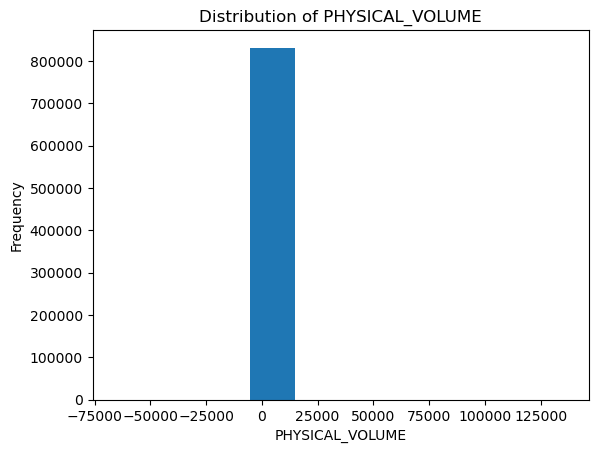

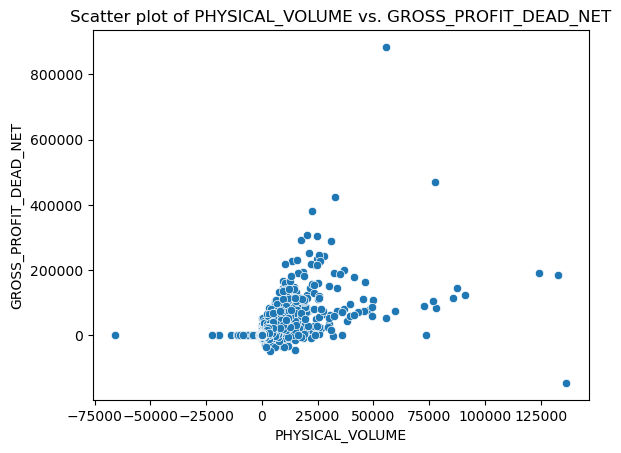

In [15]:
# Check for missing values
print(new_df.isnull().sum())

#histogram of the PHYSICAL_VOLUME column
plt.hist(new_df['PHYSICAL_VOLUME'])
plt.title('Distribution of PHYSICAL_VOLUME')
plt.xlabel('PHYSICAL_VOLUME')
plt.ylabel('Frequency')
plt.show()

#scatter plot of PHYSICAL_VOLUME vs. GROSS_PROFIT_DEAD_NET
sns.scatterplot(x='PHYSICAL_VOLUME', y='GROSS_PROFIT_DEAD_NET', data=new_df)
plt.title('Scatter plot of PHYSICAL_VOLUME vs. GROSS_PROFIT_DEAD_NET')
plt.show()

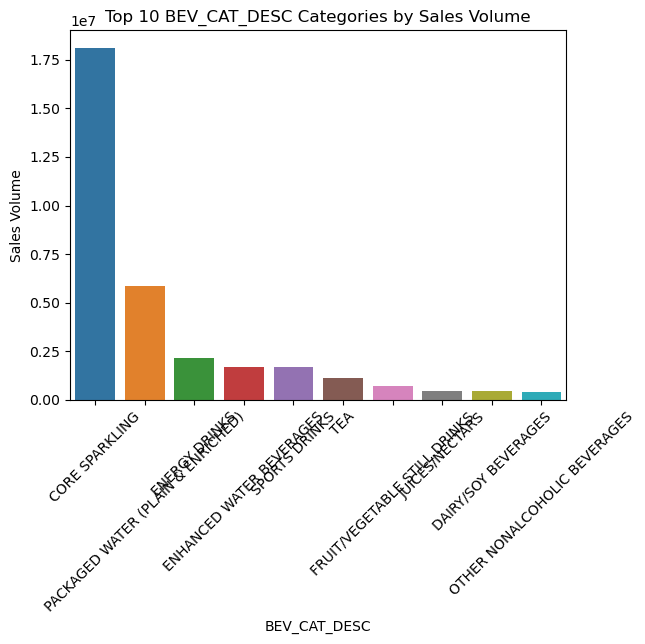

In [16]:
# bar plot of the top 10 BEV_CAT_DESC categories by sales volume
top_bev_cats = new_df.groupby('BEV_CAT_DESC')['PHYSICAL_VOLUME'].sum().nlargest(10)
sns.barplot(x=top_bev_cats.index, y=top_bev_cats.values)
plt.title('Top 10 BEV_CAT_DESC Categories by Sales Volume')
plt.xlabel('BEV_CAT_DESC')
plt.xticks(rotation=45)
plt.ylabel('Sales Volume')
plt.show()